<a href="https://colab.research.google.com/github/MohebZandi/Comupter_Vision/blob/main/Data_Numpy_vs_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: A deep understanding of deep learning
## SECTION: Data matrices and loaders
### LECTURE: Anatomy of a torch dataset and dataloader
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202108

In [ ]:
  # import libraries
import numpy as np
import torch
from torch.utils.data import DataLoader,TensorDataset

In [ ]:
# create some data in numpy

nObservations = 100
nFeatures = 20

data = np.random.randn(nObservations,nFeatures)

In [ ]:
# Convert to pytorch tensor
dataT = torch.tensor( data ) 

# print out some information
print('Numpy data:')
print(type(data))
print(data.shape) # numpy -> .shape
print(data.dtype)
print(' ')

print('Tensor data:')
print(type(dataT))
print(dataT.size()) # torch -> .size()
print(dataT.dtype)
print(' ')

Numpy data:
<class 'numpy.ndarray'>
(100, 20)
float64
 
Tensor data:
<class 'torch.Tensor'>
torch.Size([100, 20])
torch.float64
 


In [ ]:
# Sometimes you need to convert data types

dataT2 = torch.tensor( data ).float()    # float data type in tensor
print(dataT2.dtype)

# "long" is for ints
dataT3 = torch.tensor( data ).long()    # int64 data type in tensor
print(dataT3.dtype)


torch.float32
torch.int64


In [ ]:
# Convert tensor into PyTorch Datasets

# dataset = TensorDataset(data)     # not a tensor!
dataset = TensorDataset(dataT)

# dataset is a two-element tuple comprising data,labels
dataset.tensors[0]

tensor([[-0.1410,  0.6943,  0.5690,  ...,  0.7256, -0.1225, -0.2654],
        [ 1.7044,  0.2279,  0.2249,  ..., -2.1575,  0.6620,  0.2855],
        [-0.5568,  0.6708,  1.2340,  ...,  1.7823,  0.3084,  1.0239],
        ...,
        [ 1.5667,  0.5222, -0.1578,  ..., -0.1839, -0.6661,  0.5595],
        [-0.9942,  1.9583,  0.1899,  ...,  0.0719,  1.1933,  1.5907],
        [-0.9264, -0.2730,  0.7271,  ..., -0.2822,  2.3999,  0.2298]],
       dtype=torch.float64)

In [ ]:
# Let's try again with labels
labels = torch.ceil(torch.linspace(.01,4,nObservations))

# transform to an actual matrix (column vector)



tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])


In [ ]:
# see the labels for every row
labels = labels.reshape(( len(labels),1 ))
print( labels )

In [ ]:

# now make another dataset
dataset = TensorDataset(dataT,labels)
print( dataset.tensors[0].size() )
print( dataset.tensors[1].size() )

# for comparison
print( np.shape(np.random.randint(5,size=nObservations)) )

torch.Size([100, 20])
torch.Size([100, 1])
(100,)


In [ ]:
dataset[0]    # it contains the data and label in one row

(tensor([-0.1410,  0.6943,  0.5690,  0.7939,  0.5175,  1.4316,  0.9518, -1.1957,
         -0.2280,  0.4413, -0.3202, -1.4459, -0.1835,  0.0931,  0.7619, -0.8573,
          1.3076,  0.7256, -0.1225, -0.2654], dtype=torch.float64),
 tensor([1.]))

Data Loaders

In [ ]:
# create a dataloader object
batchsize = 25
dataloader = DataLoader(dataset, batch_size= batchsize) #,shuffle= True, drop_last= True)

dataloader.dataset.tensors[0].size()

torch.Size([100, 20])

Using the batches in training the model

In [ ]:
# sizes of each batch
for dat,labs in dataloader:
  print('BATCH INFO:')
  print(dat.size())
  print(labs.size())
  print(' ')

BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 


In [ ]:
# inspect the labels
for dat,labs in dataloader:
  print(labs.T)
  print(' ')

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.]])
 
tensor([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2.]])
 
tensor([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
         3., 3., 3., 3., 3., 3., 3.]])
 
tensor([[4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 4., 4., 4., 4., 4.]])
 


In [ ]:
# try again with shuffling (shuffling happens during iterations)
# dataloader = DataLoader(dataset,batch_size=batchsize,shuffle=True)

for dat,labs in dataloader:     # Even when we comment the above code, the shuffling will be done
  print(labs.T)
  print(' ')

tensor([[2., 1., 2., 4., 1., 1., 4., 4., 3., 3., 3., 1., 4., 4., 2., 4., 1., 4.,
         2., 4., 3., 1., 1., 3., 1.]])
 
tensor([[2., 1., 4., 1., 4., 4., 2., 4., 2., 1., 4., 3., 2., 2., 4., 4., 3., 1.,
         1., 3., 3., 2., 1., 1., 2.]])
 
tensor([[4., 3., 3., 3., 2., 4., 2., 2., 3., 2., 4., 2., 1., 1., 4., 4., 1., 2.,
         1., 2., 1., 4., 3., 4., 4.]])
 
tensor([[2., 3., 1., 1., 1., 4., 3., 3., 2., 2., 3., 1., 2., 3., 2., 3., 3., 3.,
         2., 1., 3., 4., 3., 2., 3.]])
 


In [ ]:
# To get only one batch (e.g., for testing)

dat,labs = next(iter(dataloader))

labs

tensor([[3.],
        [1.],
        [3.],
        [4.],
        [2.],
        [4.],
        [3.],
        [2.],
        [2.],
        [2.],
        [4.],
        [1.],
        [3.],
        [1.],
        [3.],
        [4.],
        [3.],
        [4.],
        [1.],
        [3.],
        [4.],
        [3.],
        [1.],
        [4.],
        [2.]])

## Sample Size and Network Depth

In [ ]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
# a function that creates data

def createSomeData(nPerClust):

  A = [ 1, 1 ]
  B = [ 5, 1 ]
  C = [ 4, 4 ]

  # generate data
  a = [ A[0]+np.random.randn(nPerClust) , A[1]+np.random.randn(nPerClust) ]
  b = [ B[0]+np.random.randn(nPerClust) , B[1]+np.random.randn(nPerClust) ]
  c = [ C[0]+np.random.randn(nPerClust) , C[1]+np.random.randn(nPerClust) ]

  # true labels
  labels_np = np.hstack(( np.zeros((nPerClust)),
                          np.ones( (nPerClust)),
                        1+np.ones( (nPerClust))  ))

  # concatanate into a matrix, then convert to a pytorch tensor
  data_np = np.hstack((a,b,c)).T

  # NEW: put all outputs into a dictionary
  output = {}
  output['data'] = torch.tensor(data_np).float()
  output['labels'] = torch.tensor(labels_np).long() # note: "long" format (integers) for labels

  # use scikitlearn to split the data
  train_data,test_data, train_labels,test_labels = train_test_split(output['data'], output['labels'], train_size=.9)

  # then convert them into PyTorch Datasets (note: already converted to tensors)
  train_data = TensorDataset(train_data,train_labels)
  test_data  = TensorDataset(test_data,test_labels)

  # finally, translate into dataloader objects
  batchsize  = 8
  output['train_data'] = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
  output['test_data']  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

  return output

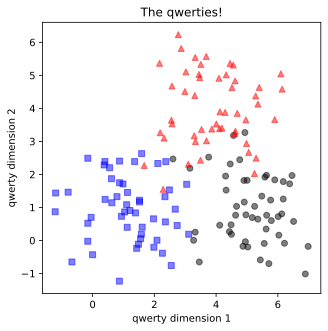

In [ ]:
# Check that the function works

theData = createSomeData(50)

data = theData['data']
labels = theData['labels']

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

### Create the model

In [ ]:
# create a class for the model
def createTheQwertyNet(nUnits,nLayers):

  class qwertyNet(nn.Module):
    def __init__(self,nUnits,nLayers):
      super().__init__()

      # create dictionary to store the layers
      self.layers = nn.ModuleDict()
      self.nLayers = nLayers

      ### input layer
      self.layers['input'] = nn.Linear(2,nUnits)
      
      ### hidden layers
      for i in range(nLayers):
        self.layers[f'hidden{i}'] = nn.Linear(nUnits,nUnits)

      ### output layer
      self.layers['output'] = nn.Linear(nUnits,3)
    

    # forward pass
    def forward(self,x):
      # input layer
      x = self.layers['input'](x)

      # hidden layers
      for i in range(self.nLayers):
        x = F.relu( self.layers[f'hidden{i}'](x) )
      
      # return output layer
      x = self.layers['output'](x)
      return x
  
  # create the model instance
  net = qwertyNet(nUnits,nLayers)
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [ ]:
# test the model with fake input

nUnitsPerLayer = 12
nLayers = 4

net,lossf,opt = createTheQwertyNet(nUnitsPerLayer,nLayers)
print(net)

# input is ten samples
input = torch.rand(10,2)
net(input)

qwertyNet(
  (layers): ModuleDict(
    (input): Linear(in_features=2, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)


tensor([[-0.1158,  0.2000,  0.2364],
        [-0.1163,  0.1993,  0.2371],
        [-0.1162,  0.2027,  0.2322],
        [-0.1118,  0.2074,  0.2324],
        [-0.1164,  0.1995,  0.2366],
        [-0.1114,  0.2057,  0.2327],
        [-0.1156,  0.2056,  0.2318],
        [-0.1188,  0.2028,  0.2317],
        [-0.1187,  0.2011,  0.2321],
        [-0.1118,  0.2066,  0.2325]], grad_fn=<AddmmBackward0>)

In [ ]:
def function2trainTheModel(nUnits,nLayers):

  # number of epochs
  numepochs = 50
  
  # create a new model
  net,lossfun,optimizer = createTheQwertyNet(nUnits,nLayers)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_data:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_data)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) ) 
  # end epochs

  # function output
  return trainAcc,testAcc,losses,net


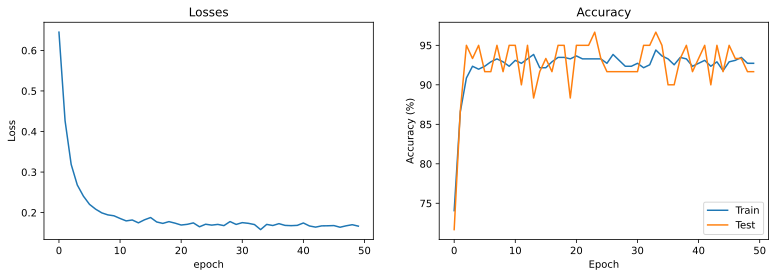

In [ ]:
### Test the model once with a bit of data, just to make sure the code works.

# generate the data
theData = createSomeData(200)
train_data = theData['train_data']
test_data  = theData['test_data']

# run the model
trainAcc,testAcc,losses,net = function2trainTheModel(80,1)



# show the results!
fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')
ax[1].legend()
plt.show()

In [ ]:
# before the experiment, configure and confirm the metaparameters

# specify the parameters for the model
nNodesInModel = 80
layersRange   = [ 1,5,10,20 ]
nDatapoints   = np.arange(50,551,50)

# create a legend for later plotting
legend = []

# print out the model architectures
for lidx,layers in enumerate(layersRange):

  # create a model
  unitsperlayer = int(nNodesInModel/layersRange[lidx])
  net = createTheQwertyNet(unitsperlayer,layers)[0]

  # count its parameters (see lecture ANNs:Depth vs. breadth)
  nparams = np.sum([ p.numel() for p in net.parameters() if p.requires_grad ])

  legend.append( '%s layers, %s units, %s params' %(layers,unitsperlayer,nparams) )
  print('This model will have %s layers, each with %s units, totalling %s parameters' %(layers,unitsperlayer,nparams))

This model will have 1 layers, each with 80 units, totalling 6963 parameters
This model will have 5 layers, each with 16 units, totalling 1459 parameters
This model will have 10 layers, each with 8 units, totalling 771 parameters
This model will have 20 layers, each with 4 units, totalling 427 parameters


In [ ]:
# note: takes ~5 mins

# initialize results matrix
results = np.zeros((len(nDatapoints),len(layersRange),2))

for didx,pnts in enumerate(nDatapoints):
  
  # create data (note: same data for each layer manipulation!)
  theData = createSomeData(pnts)
  train_data = theData['train_data']
  test_data  = theData['test_data']


  # now loop over layers
  for lidx,layers in enumerate(layersRange):
    
    unitsperlayer = int(nNodesInModel/layersRange[lidx])
    trainAcc,testAcc,losses,net = function2trainTheModel(unitsperlayer,layers)

    # average of last 5 accuracies and losses
    results[didx,lidx,0] = np.mean( testAcc[-5:] )
    results[didx,lidx,1] = torch.mean(losses[-5:]).item()

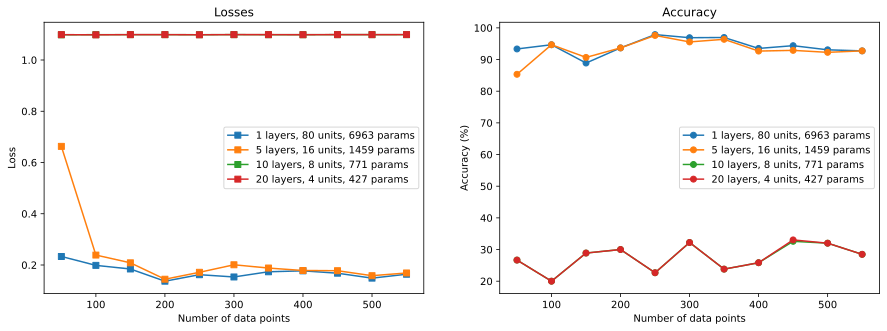

In [ ]:
# show the results!

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(nDatapoints,results[:,:,1],'s-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Number of data points')
ax[0].legend(legend)
ax[0].set_title('Losses')

ax[1].plot(nDatapoints,results[:,:,0],'o-')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Number of data points')
ax[1].set_title('Accuracy')
ax[1].legend(legend)
plt.show()
 

### Over Sample on MNIST

In [36]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [46]:
# import dataset (comes with colab!)
dataFull = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')


# now for the function
def makeTheDataset(N,doubleTheData=False):

  # extract labels (number IDs) and remove from data
  labels = dataFull[:N,0]
  data   = dataFull[:N,1:]

  # normalize the data to a range of [0 1]
  dataNorm = data / np.max(data)


#   # make an exact copy of ALL the data
#   if doubleTheData:
#     dataNorm = np.concatenate((dataNorm,dataNorm),axis=0)
#     labels   = np.concatenate((labels,labels),axis=0)


  # convert to tensor
  dataT   = torch.tensor( dataNorm ).float()
  labelsT = torch.tensor( labels ).long()

  # use scikitlearn to split the data
  train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, train_size=.9)


  # make an exact copy of the TRAIN data
  if doubleTheData:
    train_data   = torch.cat((train_data,train_data),axis=0)
    train_labels = torch.cat((train_labels,train_labels),axis=0)
  

  # convert into PyTorch Datasets
  train_data = TensorDataset(train_data,train_labels)
  test_data  = TensorDataset(test_data,test_labels)

  # translate into dataloader objects
  batchsize    = 20
  train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
  test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

  return train_loader,test_loader

In [47]:
# Check the sizes
r,t = makeTheDataset(200,False)
print(r.dataset.tensors[0].shape)
print(t.dataset.tensors[0].shape)

r,t = makeTheDataset(200,True)
print(r.dataset.tensors[0].shape)
print(t.dataset.tensors[0].shape)

torch.Size([180, 784])
torch.Size([20, 784])
torch.Size([360, 784])
torch.Size([20, 784])


### Craete a function that trains the model

In [41]:
# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,64)
      
      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return self.output(x)
  
  # create the model instance
  net = mnistNet()
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [42]:
# a function that trains the model

def function2trainTheModel():

  # number of epochs
  numepochs = 50
  
  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net

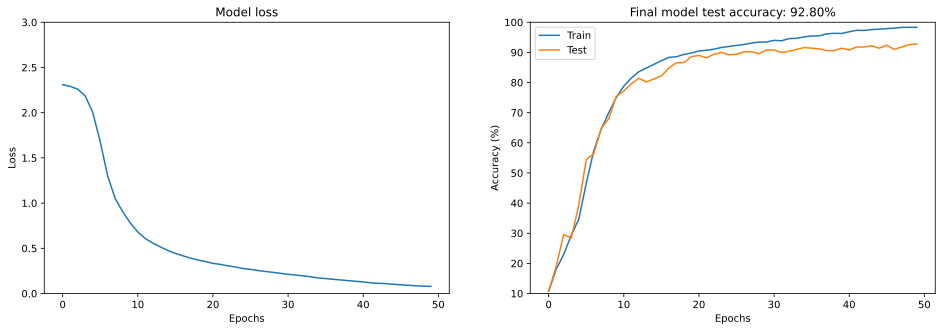

In [43]:
# generate a dataset
train_loader,test_loader = makeTheDataset(5000)

# test it
trainAcc,testAcc,losses,net = function2trainTheModel()



# plot the results
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

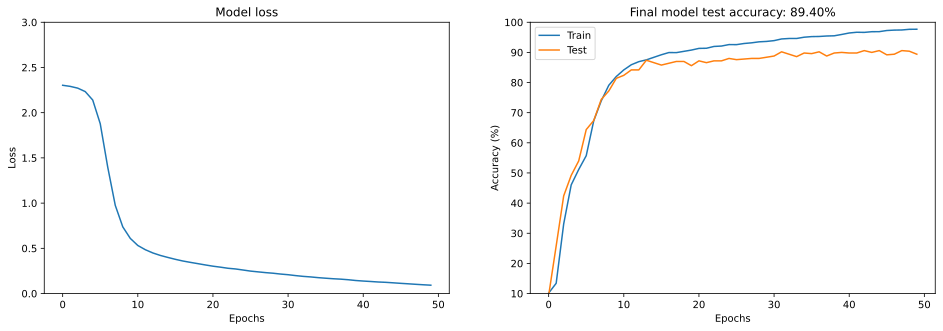

In [48]:
# generate a dataset with the trained data doubled instead of raw data doubled
train_loader,test_loader = makeTheDataset(5000)

# test it
trainAcc,testAcc,losses,net = function2trainTheModel()



# plot the results
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

In [50]:
# takes ~3 mins

# list of data sample sizes
samplesizes = np.arange(500,4001,500)

# initialize results matrix
resultsSingle = np.zeros((len(samplesizes),3))
resultsDouble = np.zeros((len(samplesizes),3))


for idx,ssize in enumerate(samplesizes):

  ### without doubling the data!

  # generate a dataset and train the model
  train_loader,test_loader = makeTheDataset(ssize,False)
  trainAcc,testAcc,losses,net = function2trainTheModel()

  # grab the results
  resultsSingle[idx,0] = np.mean(trainAcc[-5:])
  resultsSingle[idx,1] = np.mean(testAcc[-5:])
  resultsSingle[idx,2] = torch.mean(losses[-5:]).item()


  ### with doubling the data!

  # generate a dataset and train the model
  train_loader,test_loader = makeTheDataset(ssize,True)
  trainAcc,testAcc,losses,net = function2trainTheModel()

  # grab the results
  resultsDouble[idx,0] = np.mean(trainAcc[-5:])
  resultsDouble[idx,1] = np.mean(testAcc[-5:])
  resultsDouble[idx,2] = torch.mean(losses[-5:]).item()


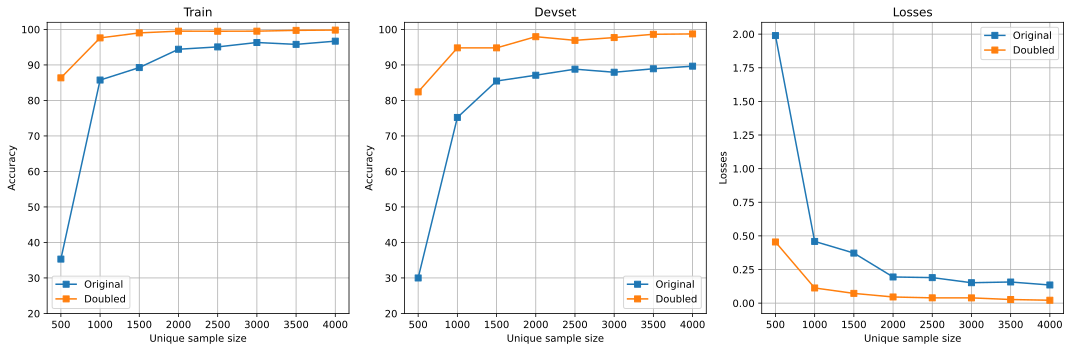

In [45]:
# Let's see what the results look like!

fig,ax = plt.subplots(1,3,figsize=(15,5))

# axis and title labels
titles    = ['Train','Devset','Losses']
yaxlabels = ['Accuracy','Accuracy','Losses']

# common features
for i in range(3):

  # plot the lines
  ax[i].plot(samplesizes,resultsSingle[:,i],'s-',label='Original')
  ax[i].plot(samplesizes,resultsDouble[:,i],'s-',label='Doubled')
  
  # make it look nicer
  ax[i].set_ylabel(yaxlabels[i])
  ax[i].set_title(titles[i])
  ax[i].legend()
  ax[i].set_xlabel('Unique sample size')
  ax[i].grid('on')

  if i<2:
    ax[i].set_ylim([20,102])


plt.tight_layout()
plt.show()

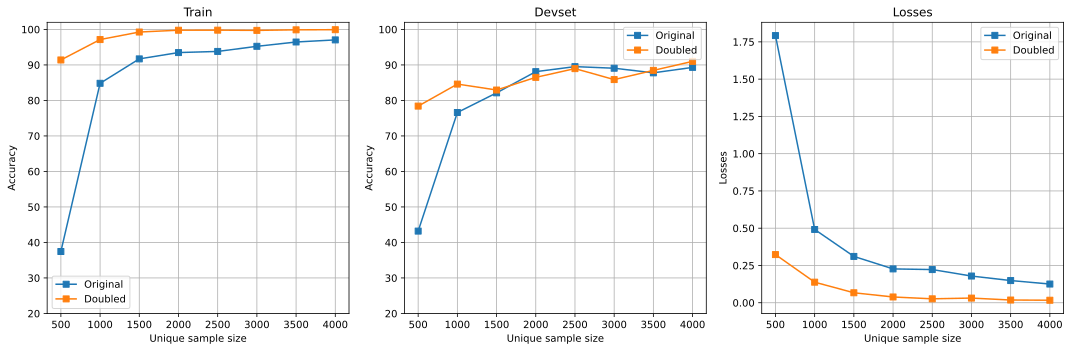

In [51]:
# Let's see what the results look like! with the trained data doubled instead of raw data doubled

fig,ax = plt.subplots(1,3,figsize=(15,5))

# axis and title labels
titles    = ['Train','Devset','Losses']
yaxlabels = ['Accuracy','Accuracy','Losses']

# common features
for i in range(3):

  # plot the lines
  ax[i].plot(samplesizes,resultsSingle[:,i],'s-',label='Original')
  ax[i].plot(samplesizes,resultsDouble[:,i],'s-',label='Doubled')
  
  # make it look nicer
  ax[i].set_ylabel(yaxlabels[i])
  ax[i].set_title(titles[i])
  ax[i].legend()
  ax[i].set_xlabel('Unique sample size')
  ax[i].grid('on')

  if i<2:
    ax[i].set_ylim([20,102])


plt.tight_layout()
plt.show()

## End Line